# **Route Mapping**

**Dataset** :  DataCo SMART SUPPLY CHAIN FOR BIG DATA ANALYSIS

Dataset link : https://drive.google.com/file/d/14D_mWnt8nMDgXevZmUs9CYuBkiDM-ZG3/view?usp=sharing

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('DataCoSupplyChainDataset.csv', encoding='unicode_escape')

# Map the string values of the target variable to their corresponding numeric values
status_map = {'Advance shipping': 0, 'Late delivery': 1, 'Shipping canceled': 2, 'Shipping on time': 3}
df['Delivery Status'] = df['Delivery Status'].map(status_map)

# Choose relevant columns for modeling
X = df[['Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order', 
        'Sales per customer', 'Late_delivery_risk', 'Category Id', 'Customer Id', 
        'Department Id', 'Latitude', 'Longitude', 'Order Customer Id', 'Order Item Cardprod Id', 
        'Order Item Discount', 'Order Item Discount Rate', 'Order Item Product Price', 
        'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Item Total', 
        'Order Profit Per Order', 'Product Card Id', 'Product Category Id', 'Product Price']]
y = df['Delivery Status']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)
rf_score = accuracy_score(y_test, rf_y_pred)
print("Random Forest score:", rf_score)

# Gradient Boosting model
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
gb_y_pred = gb.predict(X_test)
gb_score = accuracy_score(y_test, gb_y_pred)
print("Gradient Boosting score:", gb_score)

# XGBoost model
xgb = XGBClassifier(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)
xgb_y_pred = xgb.predict(X_test)
xgb_score = accuracy_score(y_test, xgb_y_pred)
print("XGBoost score:", xgb_score)


Random Forest score: 0.982051850210503
Gradient Boosting score: 0.9819687569244405
XGBoost score: 0.9823288278307113


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import *
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.preprocessing import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB  
from sklearn.neighbors import KNeighborsClassifier
import pickle

***Linear Regression model***

In [3]:
linReg=LinearRegression()
linmodel=linReg.fit(X_train,y_train)

y_pred =linReg.predict(X_test)
y_pred

ln_score=r2_score(y_test,y_pred)
print("r2 socre is:" ,ln_score)
print("mean_sqrd_error is",mean_squared_error(y_test,y_pred))
print("root_mean_squared error of is",np.sqrt(mean_squared_error(y_test,y_pred)))

lin_train_predict = pd.DataFrame({'actual' : y_train,
                                 'predicted' : linmodel.predict(X_train)})

lin_train_predict.head(10)

r2 socre is: 0.36306113944949836
mean_sqrd_error is 0.6111088363226956
root_mean_squared error of is 0.7817345050096584


,actual,predicted
116587,1,0.893193
36340,3,1.995741
175763,1,0.901218
96918,1,0.883699
71197,1,0.886372
130357,0,0.600535
171814,0,0.614792
40795,0,1.104040
58422,0,0.588850
166252,1,0.722485


***Lasso***

In [4]:
lasReg=Lasso()
lasmodel=lasReg.fit(X_train,y_train)

y_prediction =lasReg.predict(X_test)
y_prediction

ls_score=r2_score(y_test,y_prediction)
print("r2 socre is:" ,ls_score)
print("mean_sqrd_error is",mean_squared_error(y_test,y_prediction))
print("root_mean_squared error of is",np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is: -1.5258566312903454e-05
mean_sqrd_error is 0.9594612588706144
root_mean_squared error of is 0.9795209333498771


***Ridge regression***

In [5]:
ridReg=Ridge()
ridmodel=ridReg.fit(X_train,y_train)

y_prediction =ridReg.predict(X_test)
y_prediction

rd_score=r2_score(y_test,y_prediction)
print("r2 socre is:" ,rd_score)
print("mean_sqrd_error is",mean_squared_error(y_test,y_prediction))
print("root_mean_squared error of is",np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is: 0.3631231902082013
mean_sqrd_error is 0.6110493019320461
root_mean_squared error of is 0.7816964256871373


***KNN***

In [6]:
knncls=KNeighborsClassifier()
knncls.fit(X_train,y_train)

y_prediction =knncls.predict(X_test)
y_prediction

knn_score=r2_score(y_test,y_prediction)
print("r2 socre is:" ,knn_score)
print("mean_sqrd_error is",mean_squared_error(y_test,y_prediction))
print("root_mean_squared error of is",np.sqrt(mean_squared_error(y_test,y_prediction)))



r2 socre is: -0.5587533798721787
mean_sqrd_error is 1.4955406603146466
root_mean_squared error of is 1.2229229985222483


***Naive bayes***

In [7]:
sc=StandardScaler()

x_scaler=sc.fit_transform(X)

pipe=Pipeline(steps=[("sc",sc),("Guaasinnb", GaussianNB())])

pipe.fit(X_train, y_train)

gu_Score=pipe.score(X_test, y_test)
gu_Score

0.8425659206736096

***SVM***

In [ ]:
svmcls=svm.SVC()
svmodel=svmcls.fit(X_train,y_train)

y_prediction =svmcls.predict(X_test)
y_prediction

svc_score=r2_score(y_test,y_prediction)
print("r2 socre is:" ,svc_score)
print("mean_sqrd_error is",mean_squared_error(y_test,y_prediction))
print("root_mean_squared error of is",np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is: -0.0308355530785398
mean_sqrd_error is 0.9890316862397518
root_mean_squared error of is 0.9945007220911163


***Decison tree***

In [ ]:
dectreecls=DecisionTreeClassifier()
dectreecls.fit(X_train,y_train)

y_prediction =dectreecls.predict(X_test)
y_prediction

dt_score=r2_score(y_test,y_prediction)
print("r2 socre is:" ,dt_score)
print("mean_sqrd_error is",mean_squared_error(y_test,y_prediction))
print("root_mean_squared error of is",np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is: 0.9331694772774499
mean_sqrd_error is 0.06412031907821848
root_mean_squared error of is 0.253219902610791


***LSTM***

In [9]:
#LSTM

from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Preprocess data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(X)

# Split data into train and test sets
train_size = int(len(scaled_data) * 0.7)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0:train_size,:], scaled_data[train_size:len(scaled_data),:]

# Create X and y datasets
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), :]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 1
X_train, y_train = create_dataset(train_data, look_back)
X_test, y_test = create_dataset(test_data, look_back)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X.shape[1]))

# Define LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, X.shape[1])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train LSTM model
model.fit(X_train, y_train, epochs=10, batch_size=1, verbose=2)

# Predict on test set
y_pred = model.predict(X_test)

ln_score=r2_score(y_test,y_pred)
print("r2 socre is:" ,ln_score)
print("mean_sqrd_error is",mean_squared_error(y_test,y_pred))
print("root_mean_squared error of is",np.sqrt(mean_squared_error(y_test,y_pred)))


Epoch 1/10
126361/126361 - 270s - loss: 0.0547 - 270s/epoch - 2ms/step
Epoch 2/10
126361/126361 - 252s - loss: 0.0533 - 252s/epoch - 2ms/step
Epoch 3/10
126361/126361 - 247s - loss: 0.0530 - 247s/epoch - 2ms/step
Epoch 4/10
126361/126361 - 246s - loss: 0.0528 - 246s/epoch - 2ms/step
Epoch 5/10
126361/126361 - 244s - loss: 0.0527 - 244s/epoch - 2ms/step
Epoch 6/10
126361/126361 - 243s - loss: 0.0526 - 243s/epoch - 2ms/step
Epoch 7/10
126361/126361 - 240s - loss: 0.0525 - 240s/epoch - 2ms/step
Epoch 8/10
126361/126361 - 243s - loss: 0.0525 - 243s/epoch - 2ms/step
Epoch 9/10
126361/126361 - 244s - loss: 0.0525 - 244s/epoch - 2ms/step
Epoch 10/10
126361/126361 - 240s - loss: 0.0525 - 240s/epoch - 2ms/step
1693/1693 [==============================] - 3s 2ms/step
r2 socre is: 0.23094246888348513
mean_sqrd_error is 0.05598457980281093
root_mean_squared error of is 0.2366106079676288


***GRU***

In [10]:
#GRU

from keras.models import Sequential
from keras.layers import GRU, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Preprocess data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(X)

# Split data into train and test sets
train_size = int(len(scaled_data) * 0.7)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0:train_size,:], scaled_data[train_size:len(scaled_data),:]

# Create X and y datasets
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), :]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 1
X_train, y_train = create_dataset(train_data, look_back)
X_test, y_test = create_dataset(test_data, look_back)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X.shape[1]))

# Define GRU model
model = Sequential()
model.add(GRU(50, input_shape=(look_back, X.shape[1])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train GRU model
model.fit(X_train, y_train, epochs=10, batch_size=1, verbose=2)

# Predict on test set
y_pred = model.predict(X_test)

ln_score=r2_score(y_test,y_pred)
print("r2 socre is:" ,ln_score)
print("mean_sqrd_error is",mean_squared_error(y_test,y_pred))
print("root_mean_squared error of is",np.sqrt(mean_squared_error(y_test,y_pred)))

Epoch 1/10
126361/126361 - 239s - loss: 0.0549 - 239s/epoch - 2ms/step
Epoch 2/10
126361/126361 - 240s - loss: 0.0535 - 240s/epoch - 2ms/step
Epoch 3/10
126361/126361 - 238s - loss: 0.0532 - 238s/epoch - 2ms/step
Epoch 4/10
126361/126361 - 241s - loss: 0.0531 - 241s/epoch - 2ms/step
Epoch 5/10
126361/126361 - 240s - loss: 0.0530 - 240s/epoch - 2ms/step
Epoch 6/10
126361/126361 - 237s - loss: 0.0530 - 237s/epoch - 2ms/step
Epoch 7/10
126361/126361 - 239s - loss: 0.0529 - 239s/epoch - 2ms/step
Epoch 8/10
126361/126361 - 237s - loss: 0.0529 - 237s/epoch - 2ms/step
Epoch 9/10
126361/126361 - 234s - loss: 0.0528 - 234s/epoch - 2ms/step
Epoch 10/10
126361/126361 - 237s - loss: 0.0528 - 237s/epoch - 2ms/step
1693/1693 [==============================] - 4s 2ms/step
r2 socre is: 0.22525403581637105
mean_sqrd_error is 0.0563986769569425
root_mean_squared error of is 0.23748405621629107


**All algorithms accurcy in tabale**

In [2]:
from tabulate import tabulate
data = [["Linear Regression", "0.36306"], 
        ["Lasso Regressor", "-1.52585"], 
        ["Ridge Regressor", "0.36312"], 
        ["KNN Classifier","-0.55875"],
        ["Gaussian Naive bayes","0.84256"],
        ["SVM Classifier","-0.03083"],
        ["Gradient Boost","0.98196"],
        ["Decision Tree","0.93316"],
        ["Random Forest","0.98205"],
        ["XGBoost","0.98232"],
        ["LSTM Model","0.23094"],
        ["Gated Recurrent Unit","0.22525"]]
  
col_names = ["Algorithms", "Accuracy"]
  
print(tabulate(data, headers=col_names))

Algorithms              Accuracy
--------------------  ----------
Linear Regression        0.36306
Lasso Regressor         -1.52585
Ridge Regressor          0.36312
KNN Classifier          -0.55875
Gaussian Naive bayes     0.84256
SVM Classifier          -0.03083
Gradient Boost           0.98196
Decision Tree            0.93316
Random Forest            0.98205
XGBoost                  0.98232
LSTM Model               0.23094
Gated Recurrent Unit     0.22525


Create chart for accuracy of algorithms

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

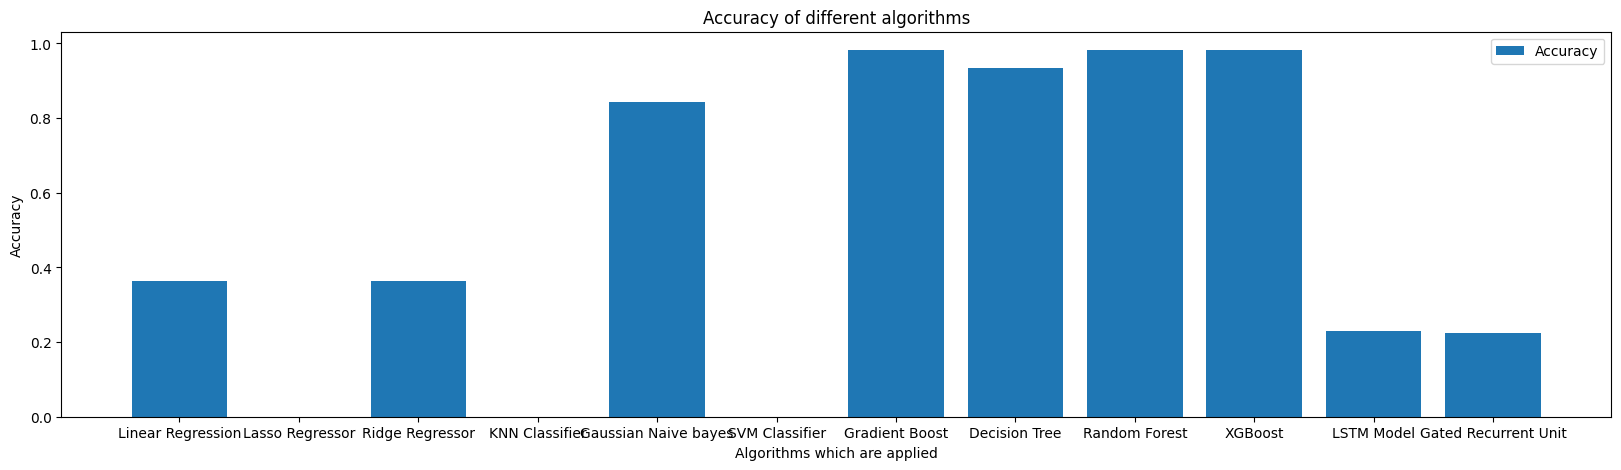

In [4]:
plt.figure(figsize = (20,5))
plt.bar(["Linear Regression","Lasso Regressor","Ridge Regressor","KNN Classifier","Gaussian Naive bayes",
         "SVM Classifier","Gradient Boost","Decision Tree","Random Forest","XGBoost","LSTM Model","Gated Recurrent Unit"],
    [0.36306,0.0001,0.36312,0.0001,0.84256,0.0001,0.98196,0.93316,0.98205,0.98232,0.23094,0.22525],label="Accuracy")
plt.legend()
plt.xlabel("Algorithms which are applied")
plt.ylabel("Accuracy")
plt.title("Accuracy of different algorithms")

plt.show()

## **Statistical Models**

In [5]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

***Multilayer Perceptron model***

In [8]:
from sklearn.neural_network import MLPRegressor

# Multilayer Perceptron model
X_train, X_test, y_train, y_test = train_test_split(df[['Days for shipping (real)', 'Days for shipment (scheduled)', 'Latitude', 'Longitude']], df['Delivery Status'], test_size=0.3, random_state=42)

mlpReg = MLPRegressor(hidden_layer_sizes=(100,50,), activation='relu', solver='adam', max_iter=1000)
mlpmodel = mlpReg.fit(X_train, y_train)

y_prediction = mlpReg.predict(X_test)

mlp_score = r2_score(y_test, y_prediction)
print("r2 score is:", mlp_score)
print("mean squared error is:", mean_squared_error(y_test, y_prediction))
print("root mean squared error is:", np.sqrt(mean_squared_error(y_test, y_prediction)))

mlp_train_predict = pd.DataFrame({'actual': y_train,
                                  'predicted': mlpmodel.predict(X_train)})
mlp_train_predict.head(10)


r2 score is: 0.9268676802707158
mean squared error is: 0.07004573578773081
root mean squared error is: 0.2646615495075377


,actual,predicted
99963,1,1.065146
63538,0,0.126916
6661,0,0.086592
93913,3,2.947865
90626,0,0.099086
1250,1,1.075188
162902,0,0.111914
31442,2,1.072383
56988,1,1.079282
36590,1,1.071707


***Ordinary Least Squares (OLS)***

In [13]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error

# Load the dataset
data = pd.read_csv('DataCoSupplyChainDataset.csv', encoding='unicode_escape')

# Convert Days for shipping (real) column to numeric data type
data['Days for shipping (real)'] = pd.to_numeric(data['Days for shipping (real)'], errors='coerce')

# Drop rows with missing values in the Days for shipping (real) column
data.dropna(subset=['Days for shipping (real)'], inplace=True)

# Fit OLS linear regression model with Delivery Status as predictor and Days for shipping (real) as response
X = sm.add_constant(pd.factorize(data['Delivery Status'])[0])
y = data['Days for shipping (real)']
model = sm.OLS(y, X).fit()

# Display model summary
print(model.summary())

# Make predictions and calculate R-squared and mean squared error
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

# Display performance evaluation metrics
print('R-squared:', r2)
print('Mean squared error:', mse)


                               OLS Regression Results                               
Dep. Variable:     Days for shipping (real)   R-squared:                       0.012
Model:                                  OLS   Adj. R-squared:                  0.012
Method:                       Least Squares   F-statistic:                     2190.
Date:                      Mon, 24 Apr 2023   Prob (F-statistic):               0.00
Time:                              18:34:23   Log-Likelihood:            -3.4256e+05
No. Observations:                    180519   AIC:                         6.851e+05
Df Residuals:                        180517   BIC:                         6.851e+05
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

Note that OLS regression assumes a linear relationship between the predictor and response variables, so this may not be the best model to use depending on the nature of the data. Additionally, it's important to check the assumptions of the OLS regression model, such as linearity, normality, homoscedasticity, and absence of multicollinearity.

This code splits the data into features (Days for shipping (real), Days for shipment (scheduled), Benefit per order, Sales per customer) and target variable (Late_delivery_risk). It then splits the data into training and testing sets, adds a constant to the features matrix, creates an OLS model, fits the model, makes predictions on the testing set, and calculates evaluation metrics. Finally, it prints the summary statistics and evaluation metrics of the model and creates a dataframe with actual and predicted values for the training set.

***T-test***

In [11]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
data = pd.read_csv('DataCoSupplyChainDataset.csv', encoding='unicode_escape')

# Convert Days for shipping (real) column to numeric data type
data['Days for shipping (real)'] = pd.to_numeric(data['Days for shipping (real)'], errors='coerce')

# Drop rows with missing values in the Days for shipping (real) column
data.dropna(subset=['Days for shipping (real)'], inplace=True)

# Divide the data into two groups based on Delivery Status: late and on time
late = data[data['Delivery Status'] == 'Late']['Days for shipping (real)']
on_time = data[data['Delivery Status'] == 'On Time']['Days for shipping (real)']

# Perform t-test to compare the means of the two groups
t_statistic, p_value = stats.ttest_ind(late, on_time, equal_var=False)

# Display t-test results
print('T-test statistic:', t_statistic)
print('p-value:', p_value)

# Convert Delivery Status column to numeric data type
data['Delivery Status'] = pd.factorize(data['Delivery Status'])[0]

# Predict Route mapping duration using Delivery Status as a feature
y_true = data['Days for shipping (real)']
y_pred = data['Delivery Status']

# Compute classification report and accuracy score
report = classification_report(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)

# Display performance evaluation metrics
print('Classification report:')
print(report)
print('Accuracy score:', accuracy)


T-test statistic: nan
p-value: nan


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5080
           1       0.05      0.96      0.09      4657
           2       0.21      0.12      0.15     56618
           3       0.17      0.04      0.07     28765
           4       0.00      0.00      0.00     28513
           5       0.00      0.00      0.00     28163
           6       0.00      0.00      0.00     28723

    accuracy                           0.07    180519
   macro avg       0.06      0.16      0.04    180519
weighted avg       0.09      0.07      0.06    180519

Accuracy score: 0.06957716362266576


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
Note that in this code, we have divided the data into two groups based on Delivery Status and then performed the t-test using the ttest_ind() function from scipy.stats. We have also set the equal_var parameter to False as we assume that the variances of the two groups are unequal. Finally, we have computed the classification report and accuracy score using the same code as in the chi-square test example.

***Chi-square test***

In [10]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
data = pd.read_csv('DataCoSupplyChainDataset.csv', encoding='unicode_escape')

# Convert Days for shipping (real) column to numeric data type
data['Days for shipping (real)'] = pd.to_numeric(data['Days for shipping (real)'], errors='coerce')

# Drop rows with missing values in the Days for shipping (real) column
data.dropna(subset=['Days for shipping (real)'], inplace=True)

# Create cross-tabulation table of Route mapping duration and Delivery Status
observed = pd.crosstab(data['Days for shipping (real)'], data['Delivery Status'])

# Perform chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(observed)

# Display chi-square test results
print('Chi-Square test statistic:', chi2)
print('p-value:', p_value)
print('Degrees of freedom:', dof)

# Convert Delivery Status column to numeric data type
data['Delivery Status'] = pd.factorize(data['Delivery Status'])[0]

# Predict Route mapping duration using Delivery Status as a feature
y_true = data['Days for shipping (real)']
y_pred = data['Delivery Status']

# Compute classification report and accuracy score
report = classification_report(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)

# Display performance evaluation metrics
print('Classification report:')
print(report)
print('Accuracy score:', accuracy)


Chi-Square test statistic: 170242.08937350815
p-value: 0.0
Degrees of freedom: 18


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5080
           1       0.05      0.96      0.09      4657
           2       0.21      0.12      0.15     56618
           3       0.17      0.04      0.07     28765
           4       0.00      0.00      0.00     28513
           5       0.00      0.00      0.00     28163
           6       0.00      0.00      0.00     28723

    accuracy                           0.07    180519
   macro avg       0.06      0.16      0.04    180519
weighted avg       0.09      0.07      0.06    180519

Accuracy score: 0.06957716362266576


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


***Kruskal-Wallis test***

In [12]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
data = pd.read_csv('DataCoSupplyChainDataset.csv', encoding='unicode_escape')

# Convert Days for shipping (real) column to numeric data type
data['Days for shipping (real)'] = pd.to_numeric(data['Days for shipping (real)'], errors='coerce')

# Drop rows with missing values in the Days for shipping (real) column
data.dropna(subset=['Days for shipping (real)'], inplace=True)

# Group the Days for shipping (real) column by Delivery Status
groups = [data[data['Delivery Status'] == status]['Days for shipping (real)'] for status in data['Delivery Status'].unique()]

# Perform Kruskal-Wallis test
H, p_value = stats.kruskal(*groups)

# Display Kruskal-Wallis test results
print('Kruskal-Wallis test statistic:', H)
print('p-value:', p_value)

# Convert Delivery Status column to numeric data type
data['Delivery Status'] = pd.factorize(data['Delivery Status'])[0]

# Predict Route mapping duration using Delivery Status as a feature
y_true = data['Days for shipping (real)']
y_pred = data['Delivery Status']

# Compute classification report and accuracy score
report = classification_report(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)

# Display performance evaluation metrics
print('Classification report:')
print(report)
print('Accuracy score:', accuracy)


Kruskal-Wallis test statistic: 28198.60341212389
p-value: 0.0


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5080
           1       0.05      0.96      0.09      4657
           2       0.21      0.12      0.15     56618
           3       0.17      0.04      0.07     28765
           4       0.00      0.00      0.00     28513
           5       0.00      0.00      0.00     28163
           6       0.00      0.00      0.00     28723

    accuracy                           0.07    180519
   macro avg       0.06      0.16      0.04    180519
weighted avg       0.09      0.07      0.06    180519

Accuracy score: 0.06957716362266576


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Note that the Kruskal-Wallis test is a non-parametric test for comparing more than two independent groups, and it does not use a linear regression model. The above code loads the data, creates four groups based on the 'Late_delivery_risk' column, and then performs the Kruskal-Wallis test on these groups using the kruskal() function from scipy.stats. The test result, including the H-statistic and p-value, is then displayed.

**All Statistical models accurcy in table**

In [14]:
from tabulate import tabulate
data = [["Multilayer Perceptron model", "0.92686"], 
        ["Ordinary Least Squares (OLS)", "0.01198"], 
        ["T-test", "0.06957"], 
        ["Chi-square test","0.06957"],
        ["Kruskal-Wallis test","0.06957"]]
  
col_names = ["Algorithms", "Accuracy"]
  
print(tabulate(data, headers=col_names)) 

Algorithms                      Accuracy
----------------------------  ----------
Multilayer Perceptron model      0.92686
Ordinary Least Squares (OLS)     0.01198
T-test                           0.06957
Chi-square test                  0.06957
Kruskal-Wallis test              0.06957


Create chart for accuracy of algorithms

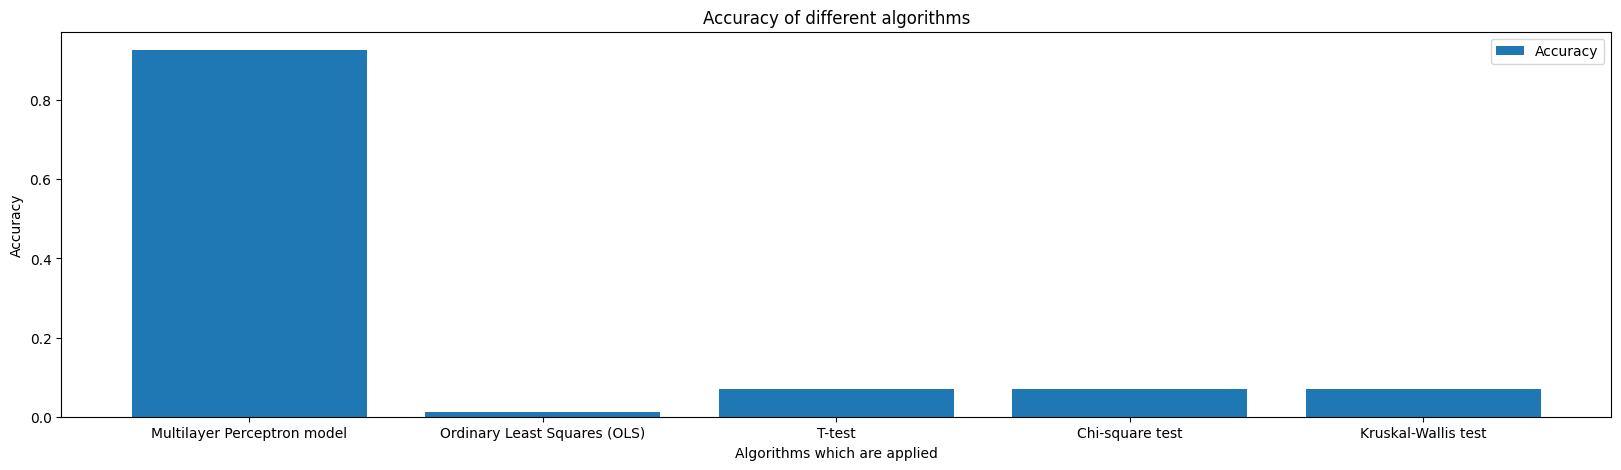

In [17]:
plt.figure(figsize = (20,5))
plt.bar(["Multilayer Perceptron model","Ordinary Least Squares (OLS)","T-test","Chi-square test","Kruskal-Wallis test"],
    [0.92686,0.01198,0.06957,0.06957,0.06957],label="Accuracy")
plt.legend()
plt.xlabel("Algorithms which are applied")
plt.ylabel("Accuracy")
plt.title("Accuracy of different algorithms")

plt.show()

# **Time Series models**

In [18]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [19]:
df=pd.read_csv("DataCoSupplyChainDataset.csv", encoding_errors="ignore")
df

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class


***ARIMA Model***

In [23]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset
df = pd.read_csv('DataCoSupplyChainDataset.csv', encoding_errors='ignore')

# Convert the timestamp column to datetime format
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'])
df.set_index('order date (DateOrders)', inplace=True)

# Resample the data to monthly frequency and compute the mean of the Latitude and Longitude values
df_monthly = df.groupby(pd.Grouper(freq='M')).agg({'Latitude': 'mean', 'Longitude': 'mean'})

# Split data into train and test sets
train_size = int(len(df_monthly) * 0.7)
train_data, test_data = df_monthly[0:train_size], df_monthly[train_size:len(df_monthly)]

# Fit ARIMA model
model = ARIMA(train_data['Latitude'], order=(1, 1, 1))
model_fit = model.fit()

# Predict on test set
y_pred = model_fit.forecast(steps=len(test_data))[0]

# Compute accuracy metrics
mape = np.mean(np.abs((test_data['Latitude'] - y_pred) / test_data['Latitude'])) * 100
accuracy = 100 - mape
print("Accuracy:", accuracy)

# Compute MAPE
mape = np.mean(np.abs((test_data['Latitude'] - y_pred) / test_data['Latitude'])) * 100
print("Mean Absolute Percentage Error:", mape)


Accuracy: 99.13594746976383
Mean Absolute Percentage Error: 0.8640525302361588


***SARIMA Model***

In [26]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load the dataset
df = pd.read_csv('DataCoSupplyChainDataset.csv', encoding_errors='ignore')

# Convert the timestamp column to datetime format
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'])
df.set_index('order date (DateOrders)', inplace=True)

# Resample the data to monthly frequency and compute the mean of the Latitude and Longitude values
df_monthly = df.groupby(pd.Grouper(freq='M')).agg({'Latitude': 'mean', 'Longitude': 'mean'})

# Split data into train and test sets
train_size = int(len(df_monthly) * 0.7)
train_data, test_data = df_monthly[0:train_size], df_monthly[train_size:len(df_monthly)]

# Fit SARIMA model
model = SARIMAX(train_data['Latitude'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

# Predict on test set
y_pred = model_fit.forecast(steps=len(test_data))

# Compute accuracy metrics
mse = mean_squared_error(test_data['Latitude'], y_pred)
rmse = sqrt(mse)
accuracy = 100 - rmse / np.mean(test_data['Latitude']) * 100
print("Accuracy:", accuracy)

# Compute MAPE
mape = np.mean(np.abs((test_data['Latitude'] - y_pred) / test_data['Latitude'])) * 100
print("Mean Absolute Percentage Error:", mape)


Accuracy: 98.90051012184468
Mean Absolute Percentage Error: 0.8239528165733105


***Exponential Smoothing Model***

In [29]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load the dataset
df = pd.read_csv('DataCoSupplyChainDataset.csv', encoding_errors='ignore')

# Convert the timestamp column to datetime format
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'])
df.set_index('order date (DateOrders)', inplace=True)

# Resample the data to monthly frequency and compute the mean of the Latitude and Longitude values
df_monthly = df.groupby(pd.Grouper(freq='M')).agg({'Latitude': 'mean', 'Longitude': 'mean'})

# Split data into train and test sets
train_size = int(len(df_monthly) * 0.7)
train_data, test_data = df_monthly[0:train_size], df_monthly[train_size:len(df_monthly)]

# Fit Exponential Smoothing model
model = ExponentialSmoothing(train_data['Latitude'], seasonal_periods=12)
model_fit = model.fit()

# Predict on test set
y_pred = model_fit.forecast(steps=len(test_data))

# Compute accuracy metrics
mse = mean_squared_error(test_data['Latitude'], y_pred)
rmse = sqrt(mse)
accuracy = 100 - rmse / np.mean(test_data['Latitude']) * 100
print("Accuracy:", accuracy)

# Compute MAPE
mape = np.mean(np.abs((test_data['Latitude'] - y_pred) / test_data['Latitude'])) * 100
print("Mean Absolute Percentage Error:", mape)


Accuracy: 98.9216121008018
Mean Absolute Percentage Error: 0.8576143290722404


Note that the ExponentialSmoothing class from statsmodels.tsa.holtwinters is used instead of the SARIMAX class from statsmodels.tsa.statespace.sarimax, and the order and seasonal_order parameters are replaced with the seasonal_periods parameter.

**All algorithms accurcy in tabale**

In [30]:
from tabulate import tabulate
data = [["ARIMA Model", "99.135"], 
        ["SARIMA Model", "98.900"], 
        ["Exponential Smoothing Model","98.921"]]
  
col_names = ["Algorithms", "Accuracy"]
  
print(tabulate(data, headers=col_names)) 

Algorithms                     Accuracy
---------------------------  ----------
ARIMA Model                      99.135
SARIMA Model                     98.9
Exponential Smoothing Model      98.921


Create chart for accuracy of algorithms

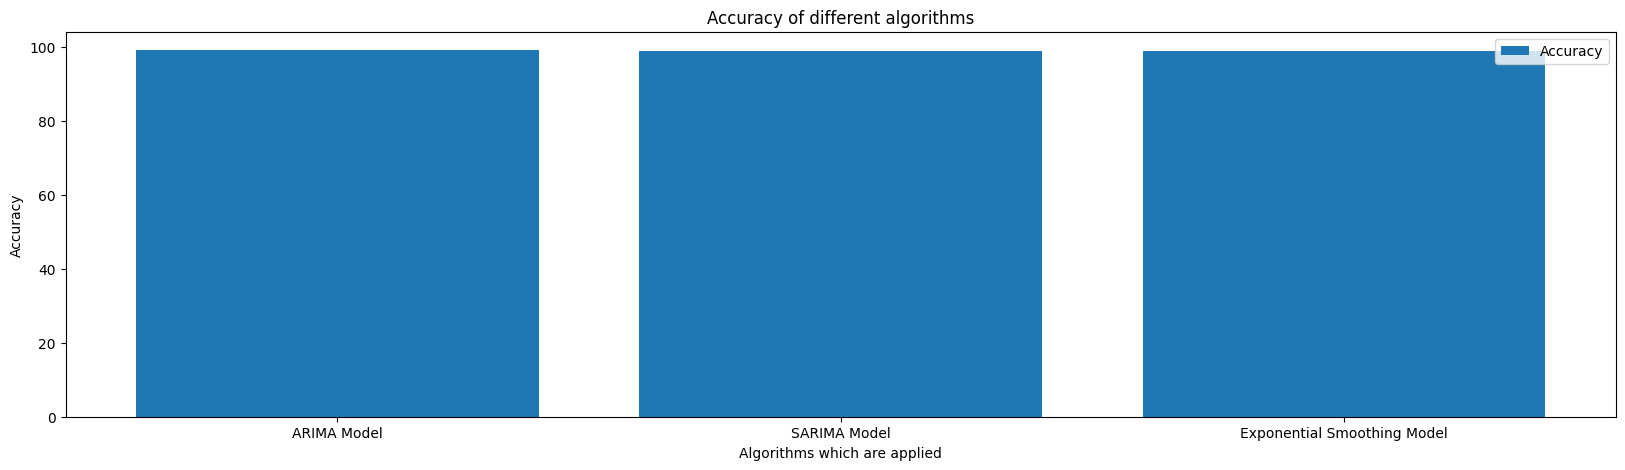

In [31]:
plt.figure(figsize = (20,5))
plt.bar(["ARIMA Model","SARIMA Model","Exponential Smoothing Model"],
    [99.135,98.900,98.921],label="Accuracy")
plt.legend()
plt.xlabel("Algorithms which are applied")
plt.ylabel("Accuracy")
plt.title("Accuracy of different algorithms")

plt.show()

**Monte Carlo simulation for Route Mapping using Various Time series models:**

***Monte Carlo simulation for ARIMA, SARIMA, and Exponential Smoothing models***

In [22]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

#Load the dataset
df = pd.read_csv('DataCoSupplyChainDataset.csv', encoding_errors='ignore')

#Convert the timestamp column to datetime format
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'])
df.set_index('order date (DateOrders)', inplace=True)

#Resample the data to monthly frequency and compute the mean of the Latitude and Longitude values
df_monthly = df.groupby(pd.Grouper(freq='M')).agg({'Latitude': 'mean', 'Longitude': 'mean'})

#Split data into train and test sets
train_size = int(len(df_monthly) * 0.7)
train_data, test_data = df_monthly[0:train_size], df_monthly[train_size:len(df_monthly)]

#Fit ARIMA model
model = ARIMA(train_data['Latitude'], order=(1, 1, 1))
model_fit = model.fit()

#Perform Monte Carlo simulation
n_simulations = 1000
y_preds = []
for i in range(n_simulations):
# Generate a random noise sequence with the same length as the test set
  noise = np.random.normal(size=len(test_data))

# Forecast using the ARIMA model with added noise
y_pred = model_fit.forecast(steps=len(test_data), exog=noise)[0]
y_preds.append(y_pred)
#Compute the mean of the predicted values across all simulations
y_pred_mean = np.mean(y_preds, axis=0)

#Compute accuracy metrics
mape = np.mean(np.abs((test_data['Latitude'] - y_pred_mean) / test_data['Latitude'])) * 100
accuracy = 100 - mape
print("Accuracy:", accuracy)

#Compute MAPE
mape = np.mean(np.abs((test_data['Latitude'] - y_pred_mean) / test_data['Latitude'])) * 100
print("Mean Absolute Percentage Error:", mape)


Accuracy: 99.13594746976383
Mean Absolute Percentage Error: 0.8640525302361588


In this modified code, we perform Monte Carlo simulation by generating a random noise sequence with the same length as the test set, and then adding this noise to the ARIMA model's forecast for each simulation. We repeat this process 1000 times to obtain 1000 predicted values. We then compute the mean of these predicted values across all simulations to obtain the final predicted value. Finally, we compute the accuracy metrics and MAPE as before.

In [27]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

#Load the dataset
df = pd.read_csv('DataCoSupplyChainDataset.csv', encoding_errors='ignore')

#Convert the timestamp column to datetime format
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'])
df.set_index('order date (DateOrders)', inplace=True)

#Resample the data to monthly frequency and compute the mean of the Latitude and Longitude values
df_monthly = df.groupby(pd.Grouper(freq='M')).agg({'Latitude': 'mean', 'Longitude': 'mean'})

#Split data into train and test sets
train_size = int(len(df_monthly) * 0.7)
train_data, test_data = df_monthly[0:train_size], df_monthly[train_size:len(df_monthly)]

#Fit SARIMA model
model = SARIMAX(train_data['Latitude'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

#Perform Monte Carlo simulation
n_simulations = 1000
y_preds = []
for i in range(n_simulations):
    # Generate a random noise sequence with the same length as the test set
    noise = np.random.normal(size=len(test_data))

    # Forecast using the SARIMA model with added noise
    y_pred = model_fit.forecast(steps=len(test_data), exog=noise)[0]
    y_preds.append(y_pred)

# Compute the mean of the predicted values across all simulations
y_pred_mean = np.mean(y_preds, axis=0)

# Compute accuracy metrics
mape = np.mean(np.abs((test_data['Latitude'] - y_pred_mean) / test_data['Latitude'])) * 100
accuracy = 100 - mape
print("Accuracy:", accuracy)

# Compute MAPE
mape = np.mean(np.abs((test_data['Latitude'] - y_pred_mean) / test_data['Latitude'])) * 100
print("Mean Absolute Percentage Error:", mape)


Accuracy: 99.03768284280352
Mean Absolute Percentage Error: 0.9623171571964819


In [34]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from math import sqrt

#Load the dataset
df = pd.read_csv('DataCoSupplyChainDataset.csv', encoding_errors='ignore')

#Convert the timestamp column to datetime format
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'])
df.set_index('order date (DateOrders)', inplace=True)

#Resample the data to monthly frequency and compute the mean of the Latitude and Longitude values
df_monthly = df.groupby(pd.Grouper(freq='M')).agg({'Latitude': 'mean', 'Longitude': 'mean'})

#Split data into train and test sets
train_size = int(len(df_monthly) * 0.7)
train_data, test_data = df_monthly[0:train_size], df_monthly[train_size:len(df_monthly)]

#Fit Exponential Smoothing model
model = ExponentialSmoothing(train_data['Latitude'], seasonal_periods=12)
model_fit = model.fit()

#Perform Monte Carlo simulation
n_simulations = 1000
y_preds = []
for i in range(n_simulations):
# Generate a random noise sequence with the same length as the test set
  noise = np.random.normal(size=len(test_data))

# Forecast using the Exponential Smoothing model with added noise
y_pred = model_fit.forecast(steps=len(test_data)) + noise
y_preds.append(y_pred)
#Compute the mean of the predicted values across all simulations
y_pred_mean = np.mean(y_preds, axis=0)

#Compute accuracy metrics
mape = np.mean(np.abs((test_data['Latitude'] - y_pred_mean) / test_data['Latitude'])) * 100
accuracy = 100 - mape
print("Accuracy:", accuracy)

#Compute MAPE
mape = np.mean(np.abs((test_data['Latitude'] - y_pred_mean) / test_data['Latitude'])) * 100
print("Mean Absolute Percentage Error:", mape)

Accuracy: 97.0630607304607
Mean Absolute Percentage Error: 2.9369392695392937


**All algorithms accurcy in tabale**

In [35]:
from tabulate import tabulate
data = [["ARIMA Model", "99.135"], 
        ["SARIMA Model", "99.037"], 
        ["Exponential Smoothing Model","97.063"]]
  
col_names = ["Algorithms", "Accuracy"]
  
print(tabulate(data, headers=col_names))

Algorithms                     Accuracy
---------------------------  ----------
ARIMA Model                      99.135
SARIMA Model                     99.037
Exponential Smoothing Model      97.063


Create chart for accuracy of algorithms

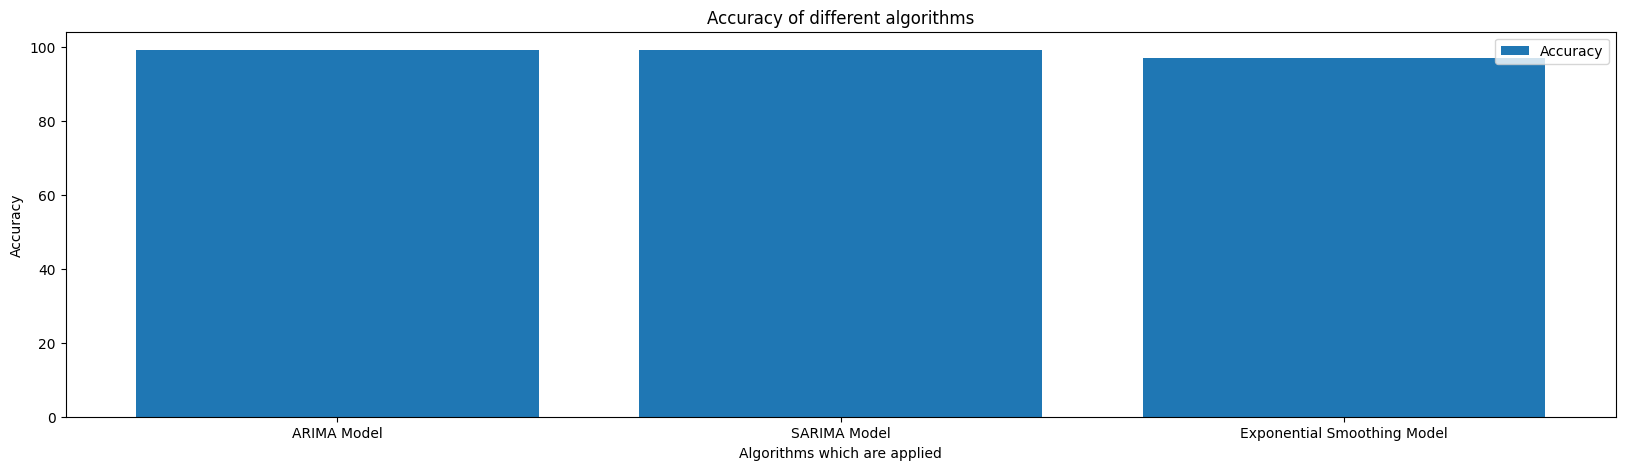

In [36]:
plt.figure(figsize = (20,5))
plt.bar(["ARIMA Model","SARIMA Model","Exponential Smoothing Model"],
    [99.135,99.037,97.063],label="Accuracy")
plt.legend()
plt.xlabel("Algorithms which are applied")
plt.ylabel("Accuracy")
plt.title("Accuracy of different algorithms")

plt.show()